# Testing the AMF

## Generating a dataset

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(200, 2, random_state=1)
print(X.shape, y.shape)
print(np.unique(y))

(200, 2) (200,)
[0 1 2]


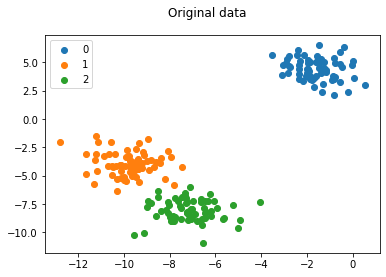

In [15]:
def plot_classes(X_test, y_test, X_train, y_train, title=None):
    fig, axs = plt.subplots()

    for c in np.unique(y_train):
        indexes_test = np.where(y_test == c)
        indexes_train = np.where(y_train == c)

        X_test_reduced = X_test[indexes_test]
        X_train_reduced = X_train[indexes_train]

        if len(indexes_test) == 0:
            print(f"No value found for class {c}")
            continue
        axs.scatter(X_test_reduced[:,0], X_test_reduced[:,1], label=str(c), color=f"C{c}")
        axs.scatter(X_train_reduced[:,0], X_train_reduced[:,1], color=f"C{c}", alpha=.1)

    axs.legend()
    if title is not None:
        fig.suptitle(title)

plot_classes(X, y, X, y, "Original data")

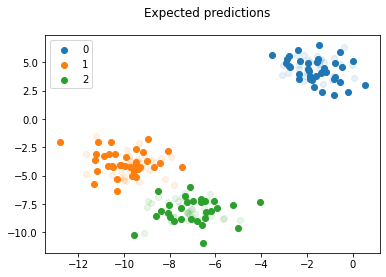

In [16]:
indexes = np.arange(0, len(X), 1)
np.random.shuffle(indexes)
index_train, index_test = indexes[0:len(X)//2], indexes[len(X)//2:]

X_train, y_train, X_test, y_test = X[index_train], y[index_train], X[index_test], y[index_test]
plot_classes(X_train, y_train, X, y, "Expected predictions")

## Using the AMFClassifier

### Checking Onelearn results first

In [17]:
from onelearn import AMFClassifier as AMFClassifierOnelearn

amf_base = AMFClassifierOnelearn(
    n_classes=len(np.unique(y)),
    n_estimators=10,
    step=1.0,
    loss="log",
    use_aggregation=True,
    dirichlet=0.1,
    random_state=1,
)

amf_base.partial_fit_helper(X_train, y_train)

AMFClassifier(n_classes=3, n_estimators=10, step=1.0, loss='log', use_aggregation=True, dirichlet=0.1, split_pure=False, n_jobs=1, random_state=1, verbose=False)

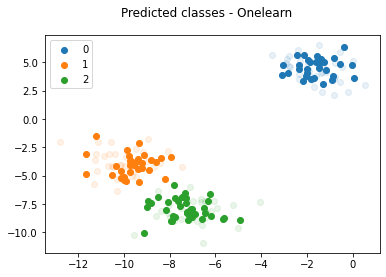

In [18]:
y_pred = amf_base.predict_proba(X_test)
y_pred = np.argmax(y_pred, axis=1)
plot_classes(X_test, y_pred, X, y, "Predicted classes - Onelearn")

### Running our AMF implementation in River

In [19]:
from river.ensemble.aggregated_mondrian_forest import AMFClassifier

amf = AMFClassifier(
    n_classes=len(np.unique(y)),
    n_estimators=10,
    step=1.0,
    loss="log",
    use_aggregation=True,
    dirichlet=0.1,
    random_state=1,
)

amf.partial_fit_helper(X_train, y_train)

C:\Users\frigi\Desktop\Code\AMFLearning\river\tree\mondrian_tree_classifier.py:183: RuntimeWarning: overflow encountered in exp
  T = np.exp(1 / extensions_sum)


AMFClassifier(n_classes=3, n_estimators=10, step=1.0, loss='log', use_aggregation=True, dirichlet=0.1, split_pure=False, n_jobs=1, random_state=1, verbose=False)

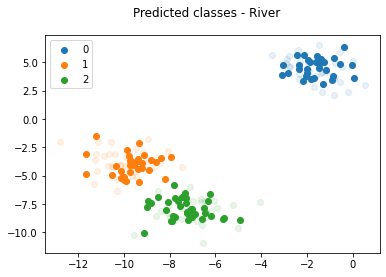

In [20]:
y_pred = amf.predict_proba(X_test)
y_pred = np.argmax(y_pred, axis=1)
plot_classes(X_test, y_pred, X, y, "Predicted classes - River")